# Лабораторная работа №2

## Моделирование проблем ракетостроения

#### *Выполнил студент группы ПИН-44 Гусаров Андрей*

### Модель 1. Исследование одноступенчатой ракеты.

#### Постановка задачи

Рассчитать параметры одноступенчатой ракеты для достижения максимальной скорости.

<img src="model1.png" alt="drawing" width="400"/>

Предположим, что:
<ol>
<li>На ракету действуют только сила тяги</li>
<li>Ракета взлетает вертикально вверх(скорость напралена вверх)</li>
<li>Ускорение сводобного падения постоянно</li>
<li>Ракету примем за материальную точку</li>
<li>Движении ракеты происходит под действием только реактивной силы</li>
</ol>

$U - скорость\ истечения\ сгорающего\ топлива$</br>
$m_{0} - масса\ ракеты\ на\ старте$</br>
$m_{p} - ``полезная``\ нагрузка$</br>
$\lambda - коэффициент\ структурной\ массы$</br>
$m_{t} - масса\ топлива\ ракеты$</br>
$m_{s} - структурная\ масса\ ракеты$</br>
$v - скорость\ ракеты$

Дано: <br>
$U = (4.24 \pm 0.05) \ кг/c$</br>
$m_{0} = (549000 \pm 500) \ кг \ (стартовая\ масса\ Falcon\ 9\ Full\ Thrust)$</br>
$m_{p} = (22800 \pm 100) \ кг \ (полезная\ масса\ Falcon\ 9\ Full\ Thrust\ при\ выходе\ на\ НОО)$</br>
$\lambda = 0.15$</br></br>
Найти: <br>
$m_{t} - ?$</br>
$m_{s} - ?$</br>
$v - ?$

#### Аналитическое исследование

Масса ракеты на старте это сумма структурной массы, массы топлива и "полезной" нагрузки:

$m_{0} = m_{p}+m_{s}+m_{t}$

Формула расчета коэфициента структурной массы:

 $\lambda = \frac{m_{s}}{m_{0}}$

Введем струтурную массу и массу топлива из системы:

$\begin{equation*}
 \begin{cases}
 m_{0} = m_{p}+m_{s}+m_{t}\\
 \lambda = \frac{m_{s}}{m_{0}}
  \end{cases}
\end{equation*}$

$ m_{s} = \lambda m_{0}$

$m_{t} = m_{0} - m_{s} - m_{p}$

Введем обозначение m:

$m = m_{p}+m_{s}$

Закон сохранения импульса в виде дифференциального уравнения в проекции на ось y:

$m\frac{dv}{dt} + U\frac{dm}{dt} = 0$

$m\frac{dv}{dt} = - U\frac{dm}{dt}$

Формула Циолковского, полученная путём интегрирования дифференциального уравнения Мещерского для материальной точки переменной массы:

$\int_0^v dv = - U  \int_m^{m_{0}} \frac{dm}{m}$

$v = U\cdot\ln{(\frac{m_{0}}{m})}$

$v = U\cdot\ln{(\frac{m_{0}}{m_{p}+m_{s}})}$

$v = U\cdot\ln{(\frac{m_{0}}{m_{0}-m_{t}})}$

#### Численное решение

Функция для расчета структурной массы:

In [1]:
def getStructMass(m0, lmbd):
    return lmbd*m0

Функция для расчета массы топлива:

In [2]:
def getFuelMass(m0, mp, ms):
    return m0 - mp - ms 

Функции для расчета скорости:

In [3]:
import math

def getSpeed(U, m0, lmbd):
    ms = getStructMass(m0, lmbd)
    return U*math.log(m0/(mp+ms))

def getSpeedWithMp(U, m0, lmbd, mp):
    return U*math.log(m0/(mp+ms))

Расчет структурной массы, массы топлива и скорости:

In [4]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24

ms = getStructMass(m0, lmbd)
mt = getFuelMass(m0, mp, ms)

print("ms =", ms,  "кг")
print("mt =", mt, "кг")
print("V =", getSpeed(U, m0, lmbd), "км/с")

ms = 82350.0 кг
mt = 443850.0 кг
V = 7.007492686889885 км/с


Функция построения графика зависимости скорости ракеты от коэффицента структурной массы:

In [5]:
import matplotlib.pyplot as plt

def graph_dependence_speed_on_lambda(U, m0, mp):
    v = []
    v_1_cosm = []
    lmbd_list = list(map(lambda x: x/100.0, range(15, 30, 1)))
    for item in lmbd_list:
        v.append(getSpeed(U, m0, item))
        v_1_cosm.append(7.91)
    plt.plot(lmbd_list, v, 'r', label = "V ракеты($\lambda$)")
    plt.plot(lmbd_list, v_1_cosm, 'm', label = "V п.к.($\lambda$)")
    plt.legend (loc=(0.01, 0.02))
    plt.title("Зависимость скорости ракеты от коэффицента структурной массы")
    plt.xlabel("Коэффицент структурной массы")
    plt.ylabel("Скорость ракеты, $ км/c $")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)

Построение графика зависимости скорости ракеты от коэффицента структурной массы:

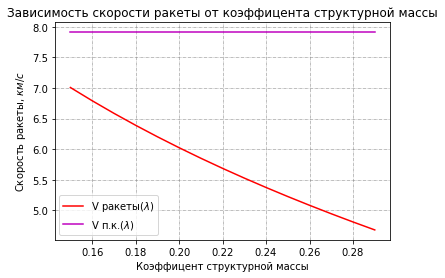

In [6]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24

graph_dependence_speed_on_lambda(U, m0, mp)

Функция построения графика зависимости скорости ракеты от "полезной" массы:

In [7]:
import matplotlib.pyplot as plt

def graph_dependence_speed_on_mp(U, m0, lmbd):
    v = []
    v_1_cosm = []
    mp_list = range(0, 50000, 500)
    for item in mp_list:
        v.append(getSpeedWithMp(U, m0, lmbd, item))
        v_1_cosm.append(7.91)

    plt.plot(mp_list, v, 'r', label = "V ракеты($\lambda$)")
    plt.plot(mp_list, v_1_cosm, 'm', label = "V п.к.($\lambda$)")
    plt.legend (loc=(0.01, 0.02))
    plt.title("Зависимость скорости ракеты от полезной массы")
    plt.xlabel("Полезная масса, кг")
    plt.ylabel("Скорость ракеты, $ км/c $")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)

Построение графика зависимости скорости ракеты от "полезной" массы:

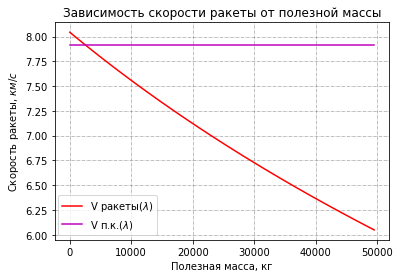

In [8]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24

graph_dependence_speed_on_mp(U, m0, lmbd)

Минимальная полезная масса используемая на 𝐹𝑎𝑙𝑐𝑜𝑛 9 𝐹𝑢𝑙𝑙 𝑇ℎ𝑟𝑢𝑠𝑡 равна 9300 кг (для полета на Марс). Так как наши параметры практически идентичны этой ракете, то будет рассматривать зависимость на графике примерно начиная именно с этой массы, т.к. значения меньше не используются для подобных ракет. 

Функция построения графика зависимости скорости ракеты от массы топлива:

In [9]:
import matplotlib.pyplot as plt

def graph_dependence_speed_on_mt(U, m0, lmbd):
    v = []
    v_1_cosm = []
    mt = m0 - mp - getStructMass(m0, lmbd)
    mtt = range(0, int(mt))
    
    for item in mtt:
        v.append(U*math.log(m0/(m0-item)))
        v_1_cosm.append(7.91)
        
    print(f"Максимальная скорость ракеты: {v[-1]}")    
    plt.plot(mtt, v, 'r', label = "V ракеты($\lambda$)")
    plt.plot(mtt, v_1_cosm, 'm', label = "V п.к.($\lambda$)")
    plt.legend (loc=(0.01, 0.02))
    plt.title("Зависимость скорости ракеты от массы сожжёного топлива")
    plt.xlabel("Масса сожжёного топлива, кг")
    plt.ylabel("Скорость ракеты, $ км/c $")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)

Построение графика зависимости скорости ракеты от массы топлива:

Максимальная скорость ракеты: 7.007452363734027


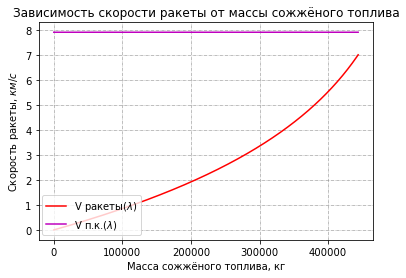

In [10]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24

graph_dependence_speed_on_mt(U, m0, lmbd)

Функция расчета погрешности для скорости ракеты:

In [11]:
import sympy
import math

def get_delta_v(U, dU, m0, dm0, mp, dmp, lmbd):  
    ms = getStructMass(m0, lmbd)
    
    def get_delta_U(dU, m0, mp, ms, numeric_U):
        U = sympy.Symbol('U')
        delta_U = (sympy.diff(U*sympy.log(m0/(mp+ms)), U)*dU).subs(U, numeric_U)
        return delta_U

    def get_delta_m0(dm0, U, mp, ms, numeric_m0):
        m0 = sympy.Symbol('m0')
        delta_m0 = (sympy.diff(U*sympy.log(m0/(mp+ms)), m0)*dm0).subs(m0, numeric_m0)
        return delta_m0

    def get_delta_mp(dmp, U, m0, ms, numeric_mp):
        mp = sympy.Symbol('mp')
        delta_mp = (sympy.diff(U*sympy.log(m0/(mp+ms)), mp)*dmp).subs(mp, numeric_mp)
        return delta_mp

    delta_U = get_delta_U(dU, m0, mp, ms, U)
    delta_m0 = get_delta_m0(dm0, U, mp, ms, m0)
    delta_mp = get_delta_mp(dmp, U, m0, ms, mp)

    return delta_U + delta_m0 + delta_mp

Расчета погрешности для скорости ракеты:

In [12]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24
dm0 = 500
dmp = 100
dU = 0.05

print(f"Погрешность максимальной скорости ракеты: {get_delta_v(U, dU, m0, dm0, mp, dmp, lmbd)} км/с")

Погрешность максимальной скорости ракеты: 0.0824647586926915 км/с


#### Основные источники ошибок

<ol>
<li>Погрешность входных данных</li>
<li>Учитана малая часть физических явлений</li>
</ol>

#### Численный результат
$v = (7.007 \pm 0.082)\ км/c $

Данное значение меньше первой космической скорости (7.91 км/c), следовательно ракета не сможет выйти даже на орбиту вокруг земли.

### Модель 2. Исследуйте полет многоступенчатой ракеты.

#### Постановка задачи

Рассчитать параметры многоступенчатой ракеты для достижения максимальной скорости.

<img src="model2.png" alt="drawing" width="300"/>

Предположим, что:
<ol>
<li>На ракету действуют только сила тяги</li>
<li>Ракета взлетает вертикально вверх</li>
<li>Ускорение сводобного падения постоянно</li>
<li>Ракету примем за материальную точку</li>
<li>Движении ракеты происходит под действием только реактивной силы</li>
<li>Структурная масса ракеты без ступеней равна структурной массе одной ступени</li>
<li>Все ступени имеют одинаковую массу</li>
</ol>

$U - скорость\ истечения\ сгорающего\ топлива$</br>
$m_{0} - масса\ ракеты\ на\ старте$</br>
$m_{p} - ``полезная``\ нагрузка$</br>
$\lambda - коэффициент\ структурной\ массы$</br>
$m_{t} - масса\ топлива\ ракеты$</br>
$m_{s} - структурная\ масса\ ракеты$</br>
$v - скорость\ ракеты$</br>
$n - количество\ ступеней$</br>
$mt1 - масса\ топлива\ одной\ ступени$</br>
$ms1 - структурная\ масса\ одной\ ступени $

Дано: <br>
$U = (4.24 \pm 0.05) \ кг/c$</br>
$m_{0} = (549000 \pm 500) \ кг \ (стартовая\ масса\ Falcon\ 9\ Full\ Thrust)$</br>
$m_{p} = (22800 \pm 100) \ кг \ (полезная\ масса\ Falcon\ 9\ Full\ Thrust\ при\ выходе\ на\ НОО)$</br>
$\lambda = 0.15$</br>
$n = \{ 1, 2, 3, 4 ,5\}$<br> <br>
Найти: <br>
$v_{n} - ?$

#### Аналитическое исследование

Воспользуемся формулами из предыдущей модели и выведем новые значения масс для ступеней:

Масса топлива на одну ступень:

$m_{t1} = \frac{m_{t}}{n}$

$m_{t1} = \frac{(m_{0} - m_{p} - \lambda * m_{0})}{n}$

Из допущений можем ввывести формулу структурной массы одной ступени или ракеты без ступеней вообще:

$m_{s1} = \frac{(m_{s})}{(n+1)}$

$m_{s1} = \frac{(\lambda * m_{0})}{(n+1)}$

Формула для одноступенчатой ракеты:

$v_{1} = u*ln(\frac{m_{0}}{m_{0} - m_{t1}})$

Формула для ракеты с двумя ступенями(рассчитаем скорость для ракеты с одной ступенью(но с учетом масс всех ступеней в m0), затем сложим с той же формулой но с новым пересчетом масс(без одной ступени):

$v_{2} = u*ln(\frac{m_{0}}{m_{0} - m_{t1}}) + u*ln(\frac{m_{0} - m_{t1} - m_{s1}}{m_{0} - m_{t1} - m_{s1} - m_{t2}})$

Теперь из предыдущей формулы скорости выведем новую для разного количества ступеней(подсчитываем скорость для n ступеней, затем пересчитываем массы, считаем скорость и складываем с предыдущей, и так пока не будут вычтены все ступени):

$v_{n} = \sum_{i = 1}^{n}(u*ln(\frac{m_{0} - (m_{t1} + m_{s1}) * (i-1)}{m_{0} - m_{t1}*i - m_{s1}*(i-1)}))$

#### Численное решение

Функция построения графиков зависимости скорости ракеты от массы топлива для разного количество ступеней ракеты:

In [13]:
import matplotlib.pyplot as plt

def graph_dependence_speed_on_mt_with_stages(U, m0, lmbd, n, colors):
    v = []
    v_1_cosm = []
    mt1 = (m0 - mp - getStructMass(m0, lmbd))/n
    ms1 = getStructMass(m0, lmbd)/(n+1)
    mtt = range(0, int(mt1))
    mT = range(0, int(mt1)*n)
    vk = 0
    
    for stage in range(n):
        for item in mtt:
            v.append(vk + U*math.log(m0/(m0-item)))
            v_1_cosm.append(7.91)
        vk = v[-1]
        m0 -= (mt1 + ms1)
    if (n == 1):
        plt.plot(mT, v_1_cosm, 'm', label = "Vп.к.($\lambda$)")
        print(f"Максимальная скорость ракеты с {n} ступенью: {v[-1]}")
    else:
        print(f"Максимальная скорость ракеты с {n} ступенями: {v[-1]}")
    plt.plot(mT, v, colors, label = f"Vр.($\lambda$) n={n}")
    plt.legend (loc=(0.01, 0.02))
    plt.title("Зависимость скорости ракеты от массы сожжёного топлива")
    plt.xlabel("Масса сожжёного топлива, кг")
    plt.ylabel("Скорость ракеты, $ км/c $")
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)

Построение графиков зависимости скорости ракеты от массы топлива для разного количество ступеней ракеты:

Максимальная скорость ракеты с 1 ступенью: 7.007452363734027
Максимальная скорость ракеты с 2 ступенями: 7.918494455981394
Максимальная скорость ракеты с 3 ступенями: 8.497696046037063
Максимальная скорость ракеты с 4 ступенями: 8.905406587701531
Максимальная скорость ракеты с 5 ступенями: 9.21025638948424


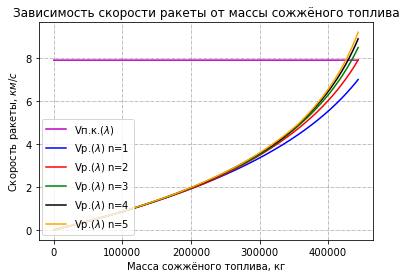

In [14]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24
n = 5

colors = ["blue", "red", "green", "black", "orange"]
for i in range(n):
    graph_dependence_speed_on_mt_with_stages(U, m0, lmbd, i+1, colors[i])

По данному графику, а также выведенным значениям можно заметить, что ракеты с нашими характеристиками с двумя и больше ступенями набирают скорость больше первой космической скорости. Ракета 𝐹𝑎𝑙𝑐𝑜𝑛 9 𝐹𝑢𝑙𝑙 𝑇ℎ𝑟𝑢𝑠𝑡 со схожими характеристиками(масса ракеты на старте и полезная масса одинаковы) имеет две ступени и успешно набирает первую космическую скорость.

Формула подсчета погрешности скорости ракеты для разного количества ступеней:

In [15]:
import sympy
import math

def get_delta_v(U, dU, m0, dm0, mp, dmp, lmbd):  
    ms = getStructMass(m0, lmbd)
    
    def get_delta_U(dU, m0, mp, ms, numeric_U):
        U = sympy.Symbol('U')
        delta_U = (sympy.diff(U*sympy.log(m0/(mp+ms)), U)*dU).subs(U, numeric_U)
        return delta_U

    def get_delta_m0(dm0, U, mp, ms, numeric_m0):
        m0 = sympy.Symbol('m0')
        delta_m0 = (sympy.diff(U*sympy.log(m0/(mp+ms)), m0)*dm0).subs(m0, numeric_m0)
        return delta_m0

    def get_delta_mp(dmp, U, m0, ms, numeric_mp):
        mp = sympy.Symbol('mp')
        delta_mp = (sympy.diff(U*sympy.log(m0/(mp+ms)), mp)*dmp).subs(mp, numeric_mp)
        return delta_mp

    delta_U = get_delta_U(dU, m0, mp, ms, U)
    delta_m0 = get_delta_m0(dm0, U, mp, ms, m0)
    delta_mp = get_delta_mp(dmp, U, m0, ms, mp)

    return delta_U + delta_m0 + delta_mp

Подсчет погрешности скорости ракеты для разного количества ступеней:

In [16]:
m0 = 549000
mp = 22800
lmbd = 0.15
U = 4.24
dm0 = 500
dmp = 100
dU = 0.05
N = 5


for i in range(N):
    n = i + 1
    mt1 = (m0 - mp - getStructMass(m0, lmbd))/n
    ms1 = getStructMass(m0, lmbd)/(n+1)

    delta_V = 0

    for stage in range(n):
        delta_V += get_delta_v(U, dU, m0, dm0, mp, dmp, lmbd)
        m0 -= (mt1 + ms1)
    if (n == 1):
        print(f"Погрешность скорости ракеты с {n} ступенью: {delta_V}")
    else:
        print(f"Погрешность скорости ракеты с {n} ступенями: {delta_V}")

Погрешность скорости ракеты с 1 ступенью: 0.0824647586926915
Погрешность скорости ракеты с 2 ступенями: 0.107865516521753
Погрешность скорости ракеты с 3 ступенями: 0.196364354758738
Погрешность скорости ракеты с 4 ступенями: 0.272392201883182
Погрешность скорости ракеты с 5 ступенями: 0.342505433146988


#### Основные источники ошибок

<ol>
<li>Погрешность входных данных</li>
<li>Учитана малая часть физических явлений</li>
</ol>

#### Численный результат
$v_{1} = (7.007 \pm 0.082)\ км/c $<br>
$v_{2} = (7.918 \pm 0.107)\ км/c $<br>
$v_{3} = (8.498 \pm 0.196)\ км/c $<br>
$v_{4} = (8.905 \pm 0.272)\ км/c $<br>
$v_{5} = (9.21 \pm 0.342)\ км/c $

Из полученных результатов можно сделать вывод, что ракета с двумя и более ступенями может успешно вылететь из атмосферы.